In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import thư viện cần thiết**

In [3]:
!pip install yfinance mplfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import matplotlib.dates as mdates

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00


# **Cài đặt danh sách cổ phiếu và ngày**

In [17]:
tickers = ['NVDA', 'AMZN', 'JPM', 'META', 'TSLA']
start_date = '2023-01-01'
end_date = '2025-05-10'

# **Load dữ liệu**

In [18]:
# Tải dữ liệu từ Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)

# Chuyển đổi dữ liệu về định dạng DataFrame đơn giản hơn
df = pd.DataFrame()
for ticker in tickers:
    df_ticker = data.loc[:, pd.IndexSlice[:, ticker]]
    df_ticker.columns = df_ticker.columns.droplevel(1)
    df_ticker = df_ticker.rename(columns=lambda col: f'{col}_{ticker}')
    df = pd.concat([df, df_ticker], axis=1)

# Thêm cột ngày
df['Date'] = data.index
df = df.set_index('Date')

[*********************100%***********************]  5 of 5 completed


In [6]:
df_ticker.isna().sum()

Price
Adj Close_TSLA    0
Close_TSLA        0
High_TSLA         0
Low_TSLA          0
Open_TSLA         0
Volume_TSLA       0
dtype: int64

# **Lọc và tính toán các loại cổ phiếu**

In [19]:
plot_symbols = ['NVDA', 'AMZN', 'JPM', 'META', 'TSLA']
etf_data_mask = {}

for ticker in plot_symbols:
    try:
        df_ticker = pd.DataFrame({
            'open': df[f'Open_{ticker}'],
            'high': df[f'High_{ticker}'],
            'low': df[f'Low_{ticker}'],
            'close': df[f'Close_{ticker}'],
            'adj_close': df[f'Adj Close_{ticker}'],
            'volume': df[f'Volume_{ticker}']
        })

        df_ticker = df_ticker.sort_index()
        df_ticker['vwap'] = (df_ticker['adj_close'] * df_ticker['volume']).cumsum() / df_ticker['volume'].cumsum()
        df_ticker['SMA_5'] = df_ticker['adj_close'].rolling(window=5).mean()
        df_ticker['EMA_20'] = df_ticker['adj_close'].ewm(span=20, adjust=False).mean()
        etf_data_mask[ticker] = df_ticker

        print(f"===== {ticker} =====")
        print(df_ticker[['open','high','low','close','adj_close', 'vwap', 'SMA_5', 'EMA_20']].tail())

    except KeyError:
        print(f"Thiếu dữ liệu cho {ticker}, bỏ qua.")

===== NVDA =====
                  open        high         low       close   adj_close  \
Date                                                                     
2025-05-05  112.910004  114.669998  112.660004  113.820000  113.812096   
2025-05-06  111.480003  114.739998  110.820000  113.540001  113.532120   
2025-05-07  113.050003  117.680000  112.279999  117.059998  117.051872   
2025-05-08  118.250000  118.680000  115.849998  117.370003  117.361855   
2025-05-09  117.349998  118.230003  115.209999  116.650002  116.641899   

                 vwap       SMA_5      EMA_20  
Date                                           
2025-05-05  70.420746  111.566252  108.955511  
2025-05-06  70.449474  112.470190  109.391379  
2025-05-07  70.489942  114.098077  110.120949  
2025-05-08  70.528972  115.249998  110.810559  
2025-05-09  70.554689  115.679968  111.365925  
===== AMZN =====
                  open        high         low       close   adj_close  \
Date                                 

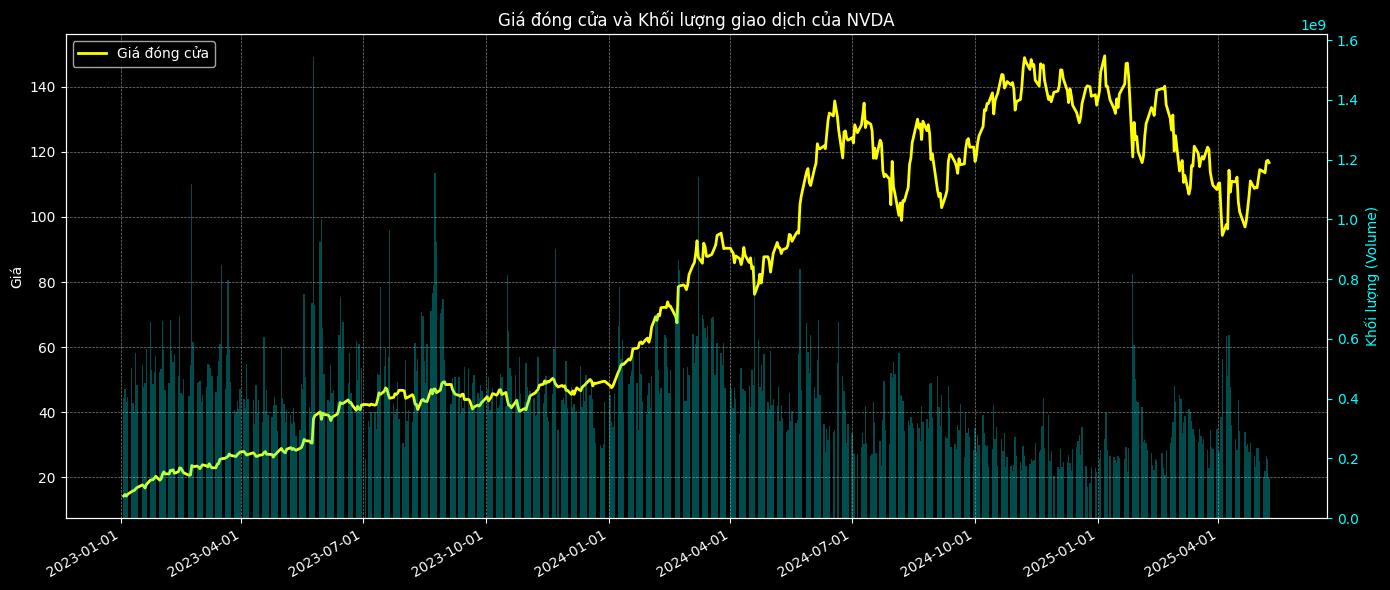

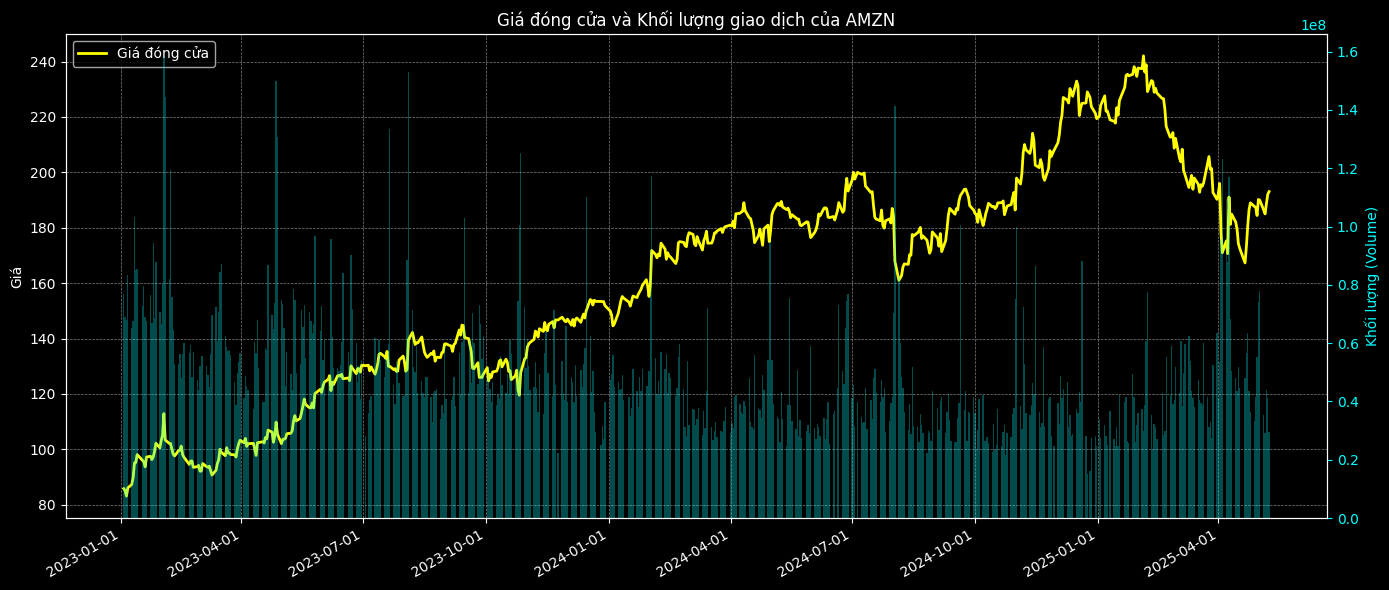

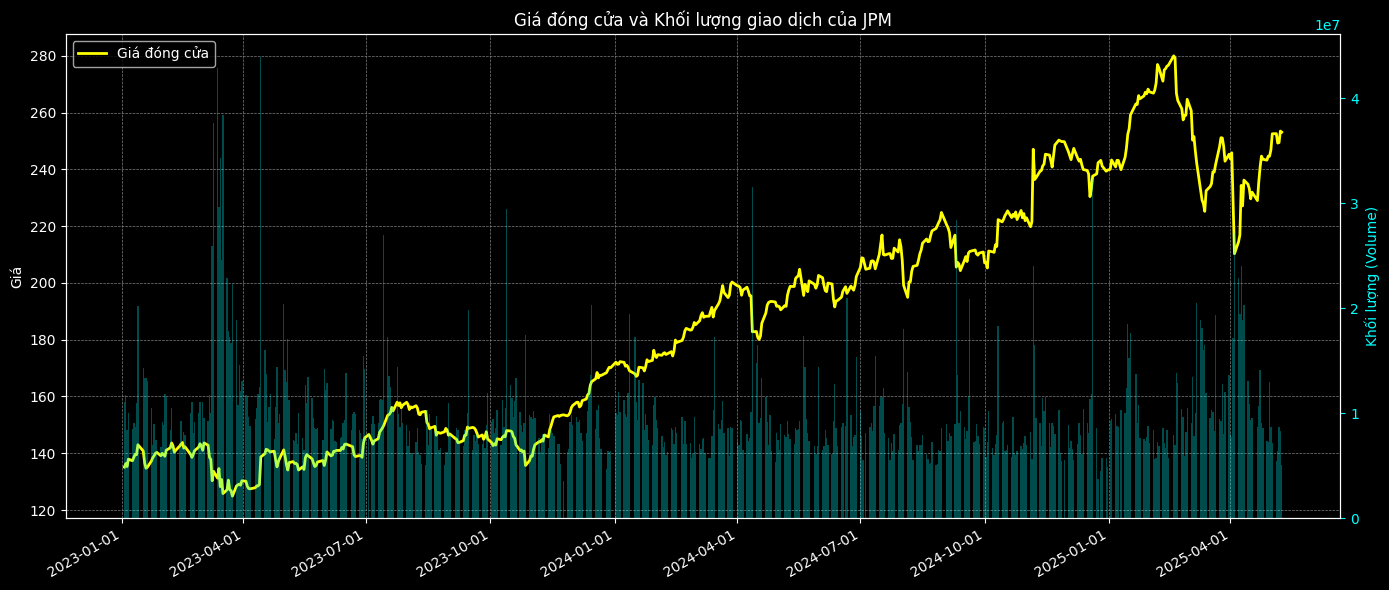

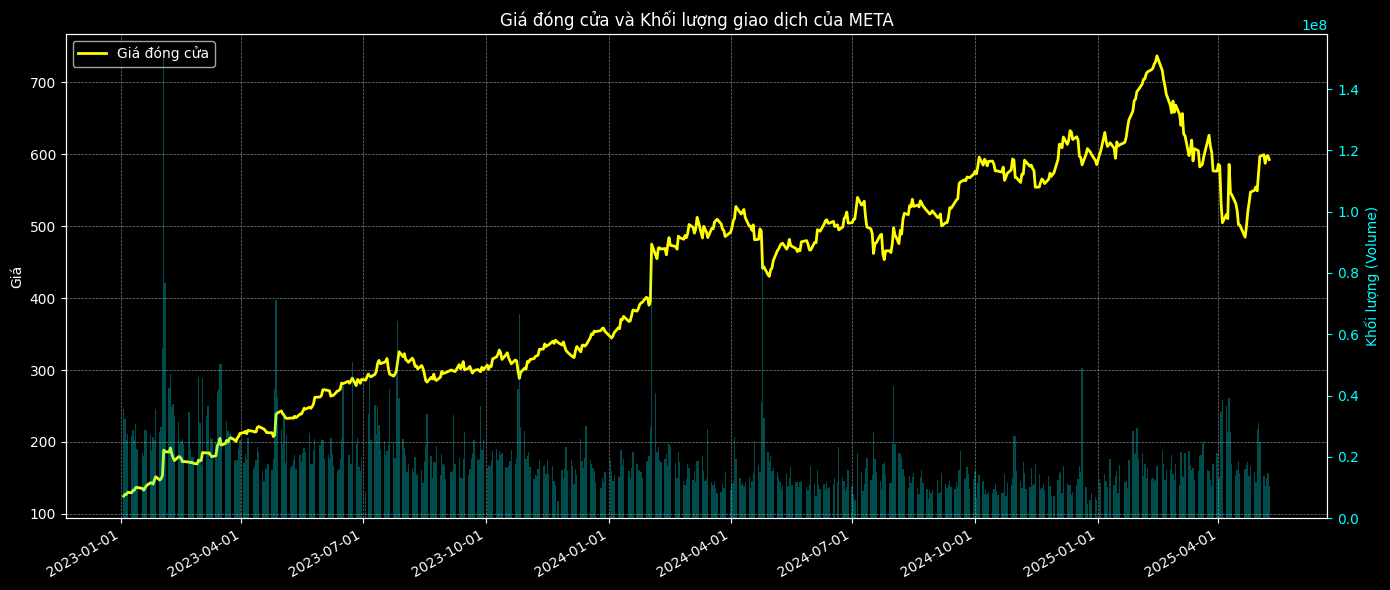

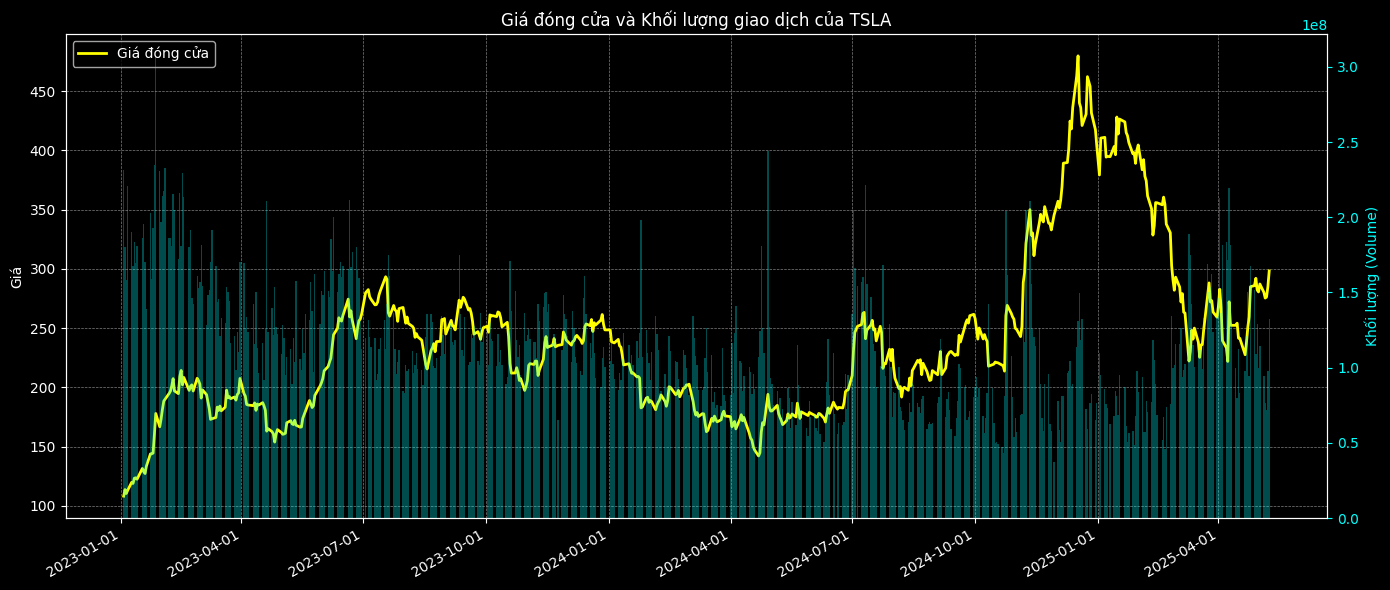

In [20]:
for ticker in plot_symbols:
    if ticker in etf_data_mask:
        df_ticker = etf_data_mask[ticker].loc[start_date:end_date]

        fig, ax1 = plt.subplots(figsize=(14, 6))
        fig.patch.set_facecolor('black')

        # Cài đặt trục trái (giá đóng cửa)
        ax1.set_facecolor('black')
        ax1.tick_params(colors='white')
        ax1.xaxis.label.set_color('white')
        ax1.yaxis.label.set_color('white')
        ax1.title.set_color('white')
        ax1.grid(True, color='gray', linestyle='--', linewidth=0.5)
        ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        fig.autofmt_xdate()

        ax1.plot(df_ticker.index, df_ticker['close'], color='yellow', label='Giá đóng cửa', linewidth=2)
        ax1.set_ylabel('Giá')
        ax1.set_title(f'Giá đóng cửa và Khối lượng giao dịch của {ticker}')

        # Tạo trục phải (khối lượng)
        ax2 = ax1.twinx()
        ax2.set_facecolor('black')
        ax2.tick_params(colors='cyan')
        ax2.yaxis.label.set_color('cyan')
        ax2.set_ylabel('Khối lượng (Volume)', color='cyan')
        ax2.bar(df_ticker.index, df_ticker['volume'], color='cyan', alpha=0.3, width=1.0)

        # Hiển thị legend
        ax1.legend(loc='upper left')

        plt.tight_layout()
        plt.show()

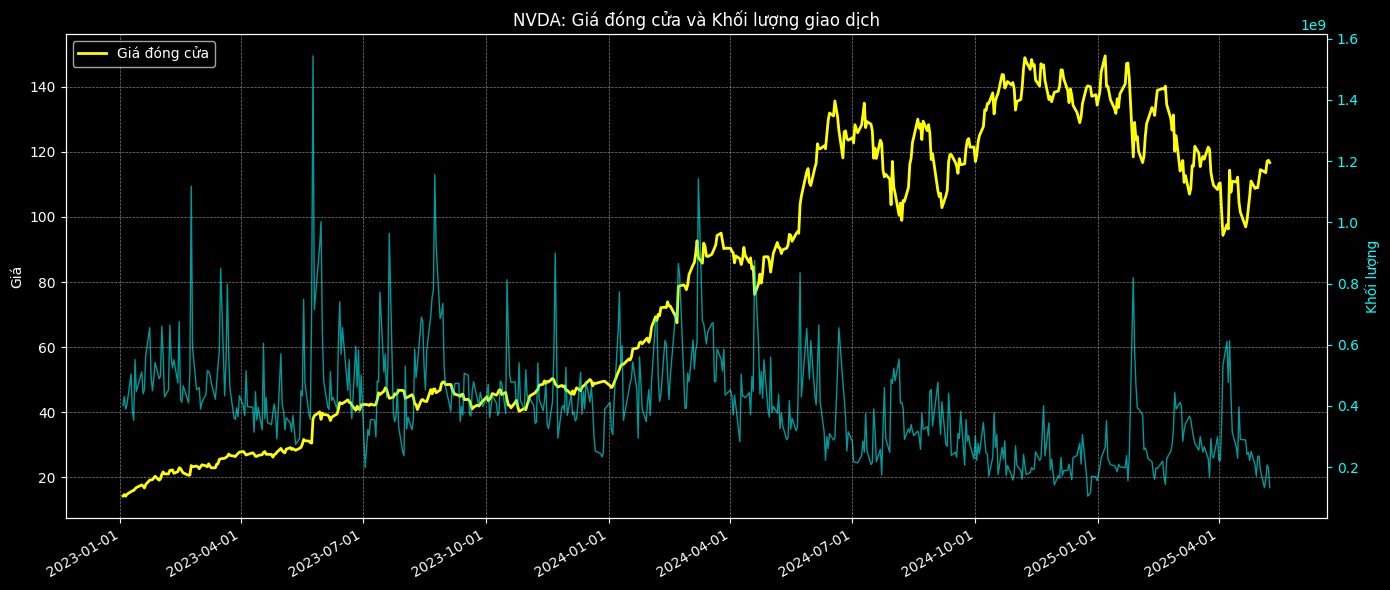

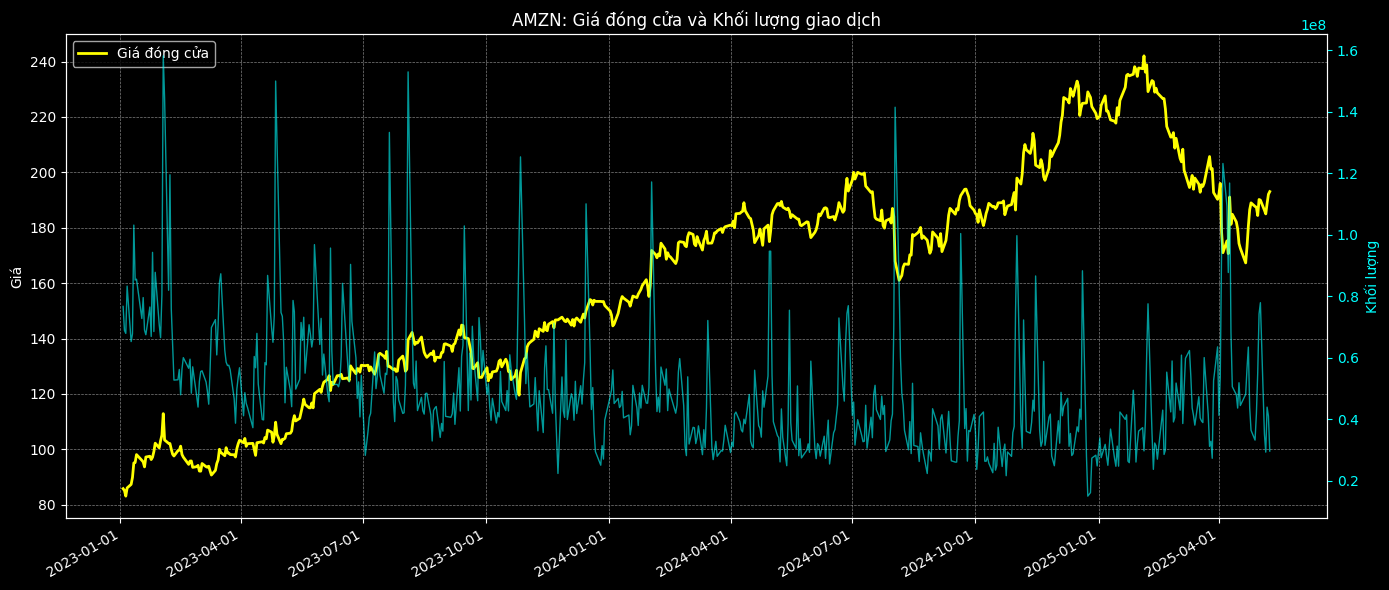

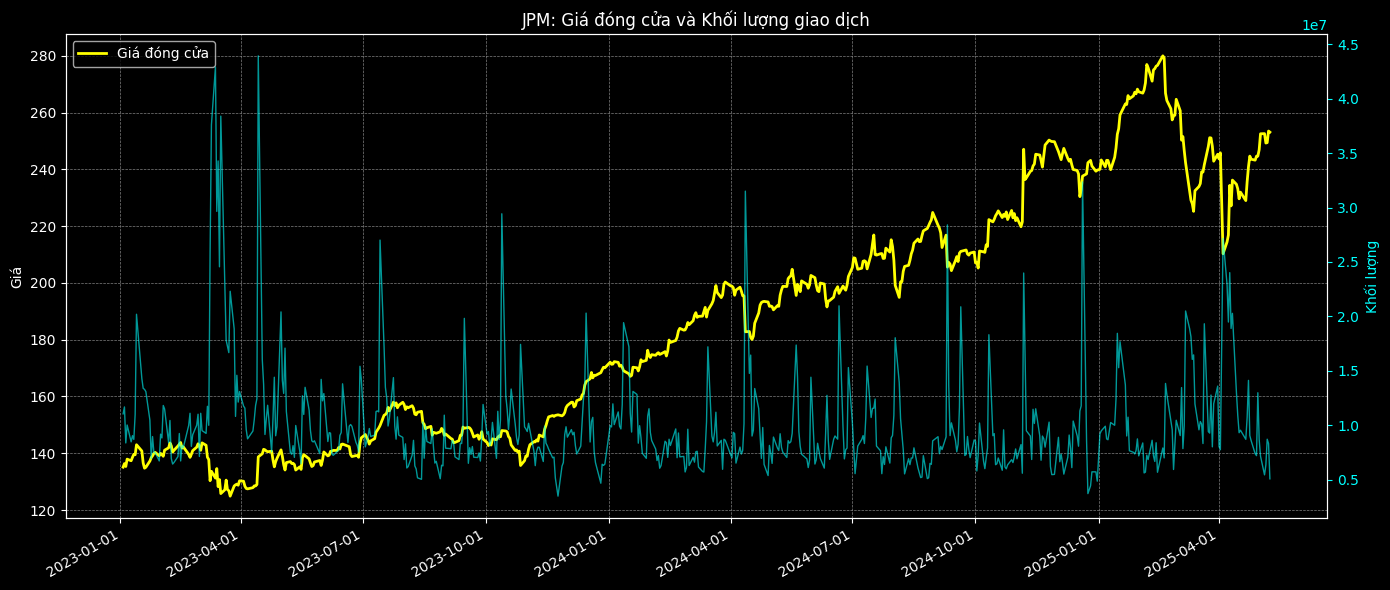

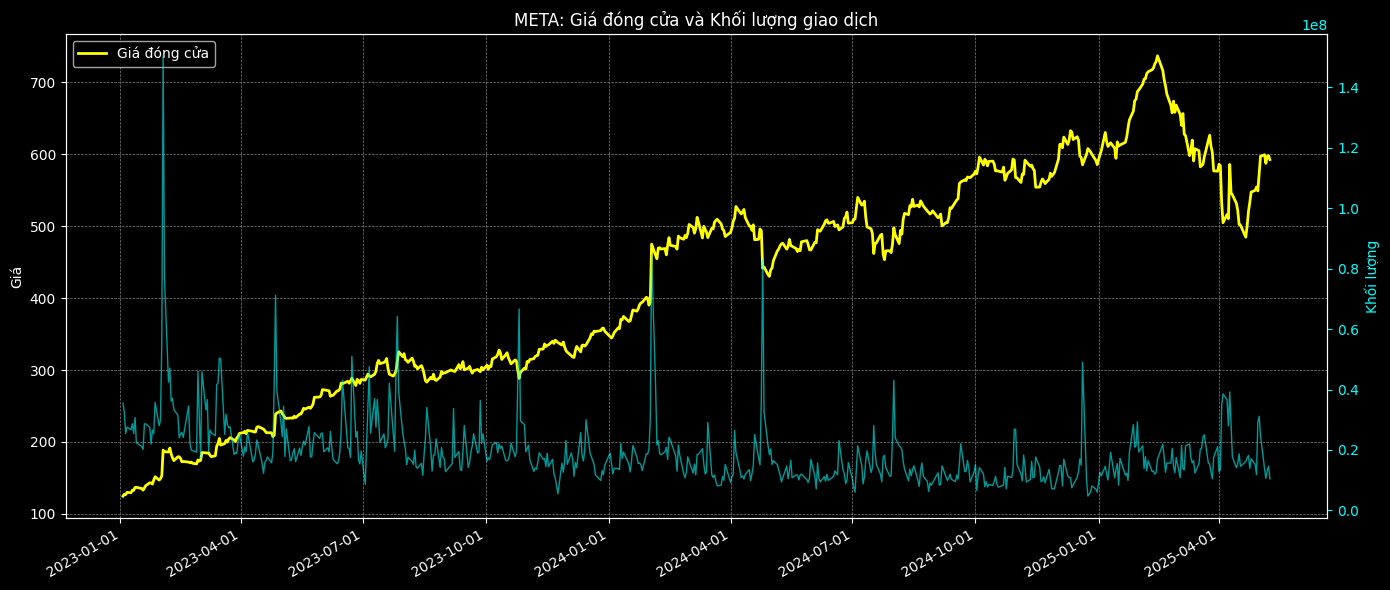

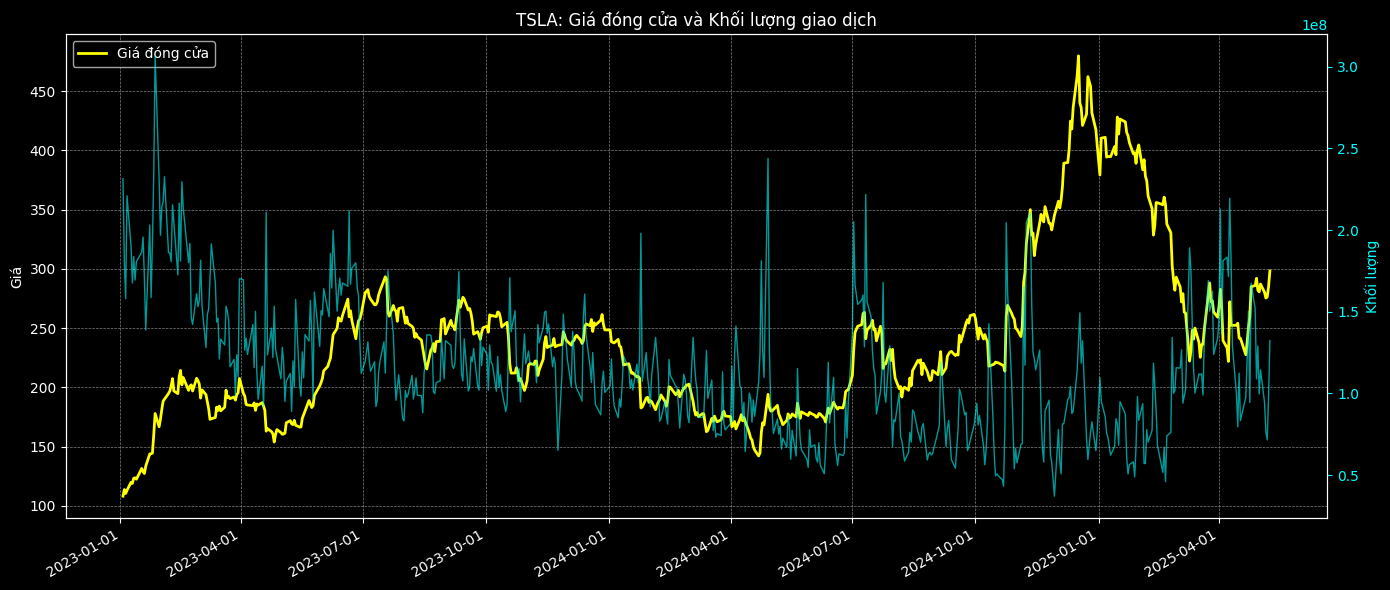

In [21]:
for ticker in plot_symbols:
    if ticker in etf_data_mask:
        df_ticker = etf_data_mask[ticker].loc[start_date:end_date]

        fig, ax1 = plt.subplots(figsize=(14, 6))
        fig.patch.set_facecolor('black')

        # Plot giá đóng cửa trên trục trái
        ax1.set_facecolor('black')
        ax1.tick_params(colors='white')
        ax1.xaxis.label.set_color('white')
        ax1.yaxis.label.set_color('white')
        ax1.title.set_color('white')
        ax1.grid(True, color='gray', linestyle='--', linewidth=0.5)
        ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        fig.autofmt_xdate()

        ax1.plot(df_ticker.index, df_ticker['close'], color='yellow', label='Giá đóng cửa', linewidth=2)
        ax1.set_ylabel('Giá')
        ax1.set_title(f'{ticker}: Giá đóng cửa và Khối lượng giao dịch')
        ax1.legend(loc='upper left')

        # Thêm trục thứ 2 bên phải để vẽ volume
        ax2 = ax1.twinx()
        ax2.plot(df_ticker.index, df_ticker['volume'], color='cyan', alpha=0.6, linewidth=1)
        ax2.set_ylabel('Khối lượng', color='cyan')
        ax2.tick_params(axis='y', colors='cyan')

        plt.tight_layout()
        plt.show()

# **Chọn ngày cần lọc** (có thể không cần chạy)

In [11]:
# Đặt khoảng thời gian để vẽ biểu đồ
start_date = pd.Timestamp('2023-01-24')
end_date = pd.Timestamp('2023-03-24')

# **Biểu đồ giá mở và đóng cửa**

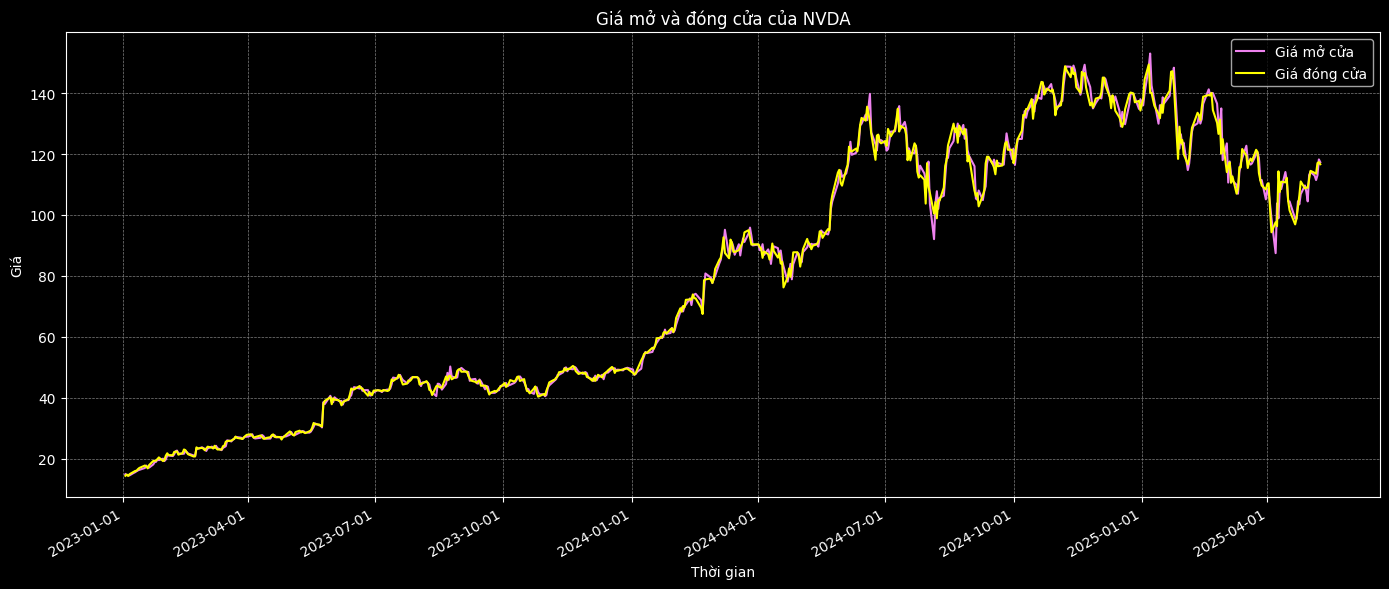

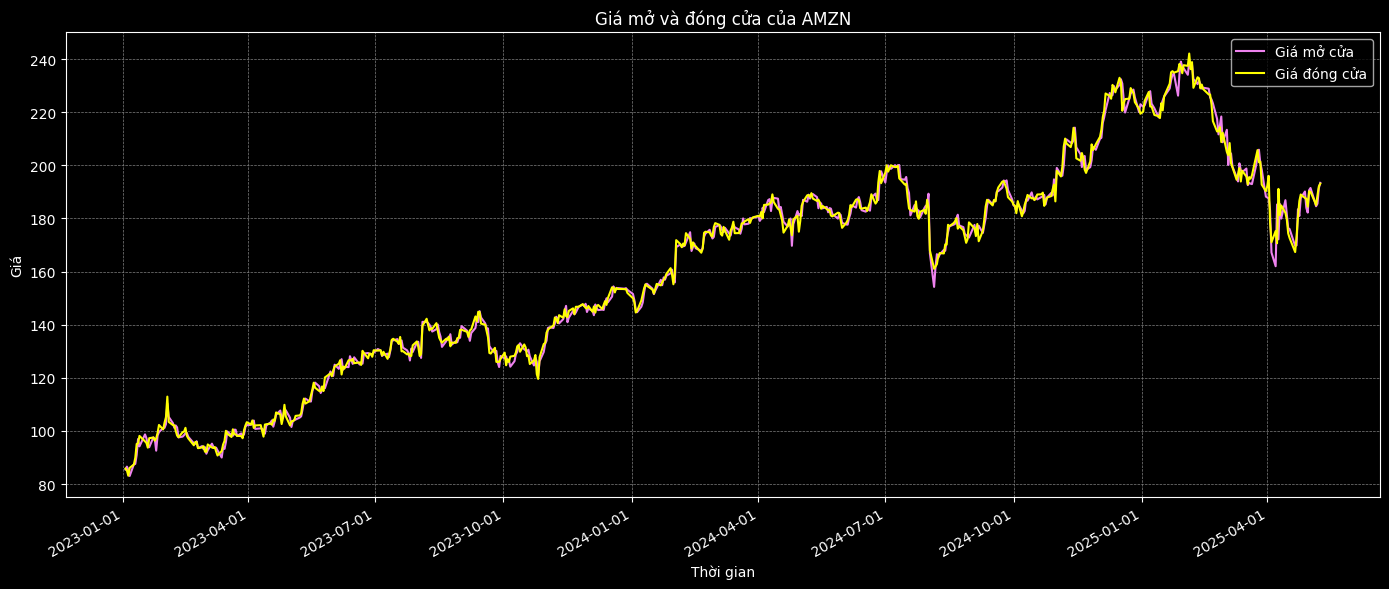

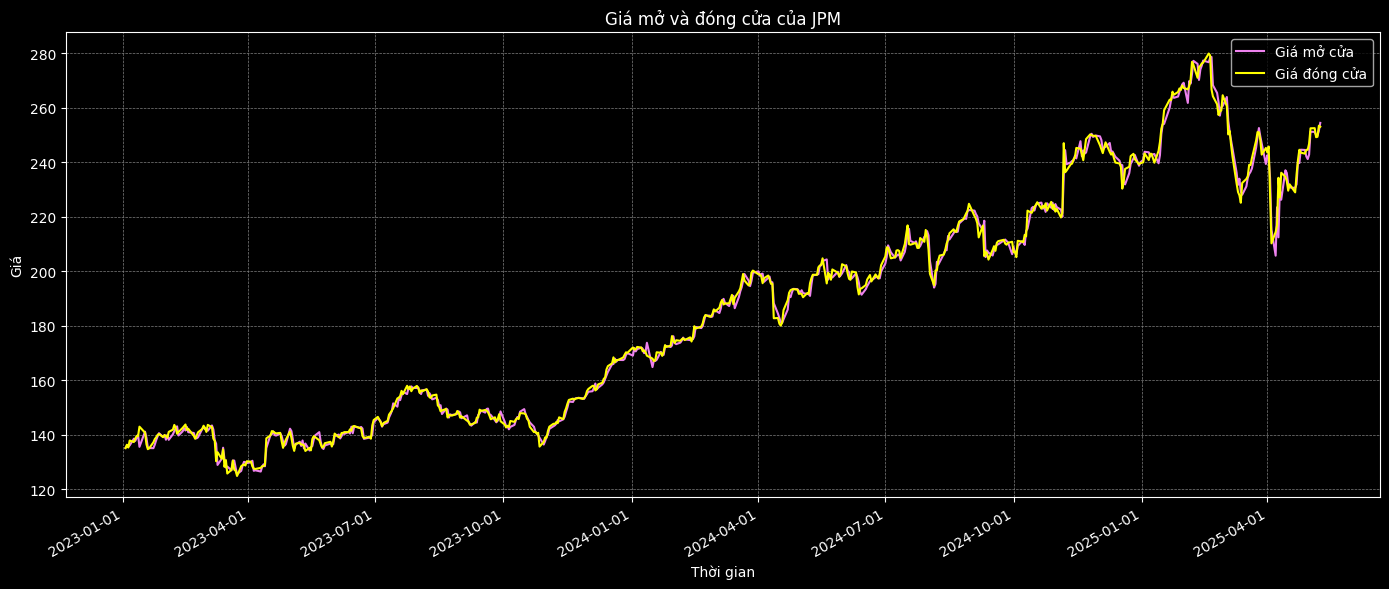

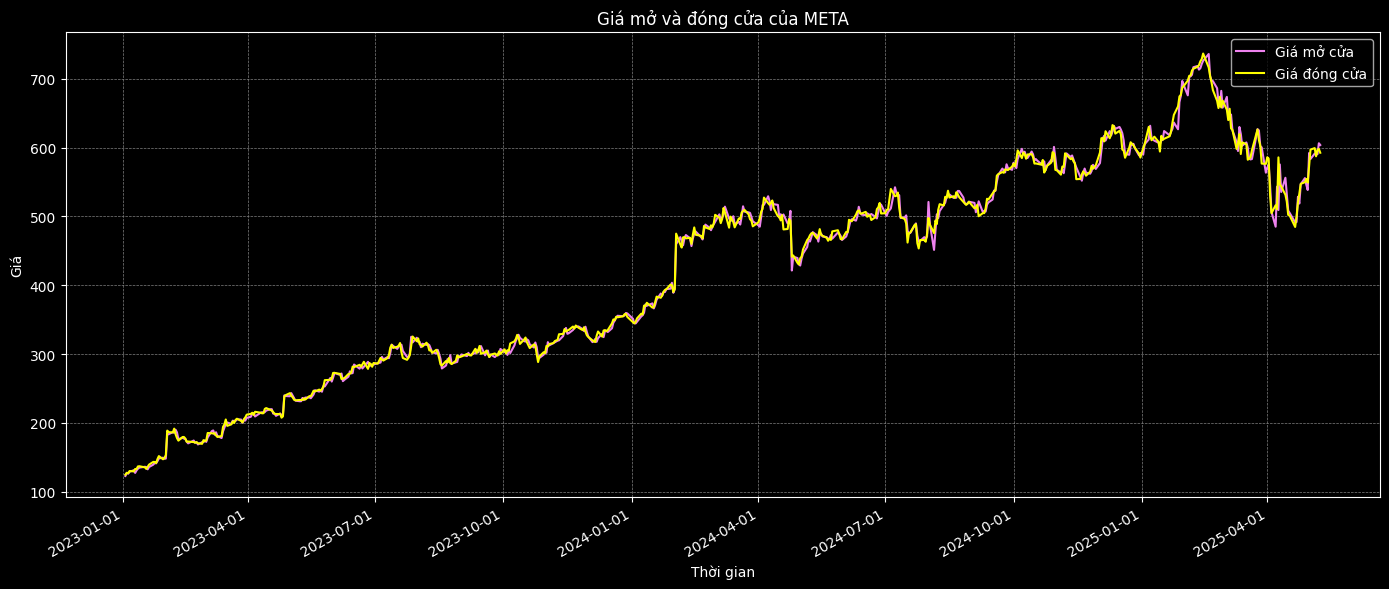

In [22]:
for ticker in plot_symbols:
    if ticker in etf_data_mask:
        df_ticker = etf_data_mask[ticker].loc[start_date:end_date]

        fig, ax = plt.subplots(figsize=(14, 6))
        fig.patch.set_facecolor('black')
        ax.set_facecolor('black')
        ax.tick_params(colors='white')
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')
        ax.title.set_color('white')
        ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        fig.autofmt_xdate()

        ax.plot(df_ticker.index, df_ticker['open'], color='violet', label='Giá mở cửa')
        ax.plot(df_ticker.index, df_ticker['close'], color='yellow', label='Giá đóng cửa')
        ax.set_title(f'Giá mở và đóng cửa của {ticker}')
        ax.set_xlabel('Thời gian')
        ax.set_ylabel('Giá')

        ax.legend()
        plt.tight_layout()
        plt.show()


# **Biểu đồ giá cao nhất và thấp nhất**

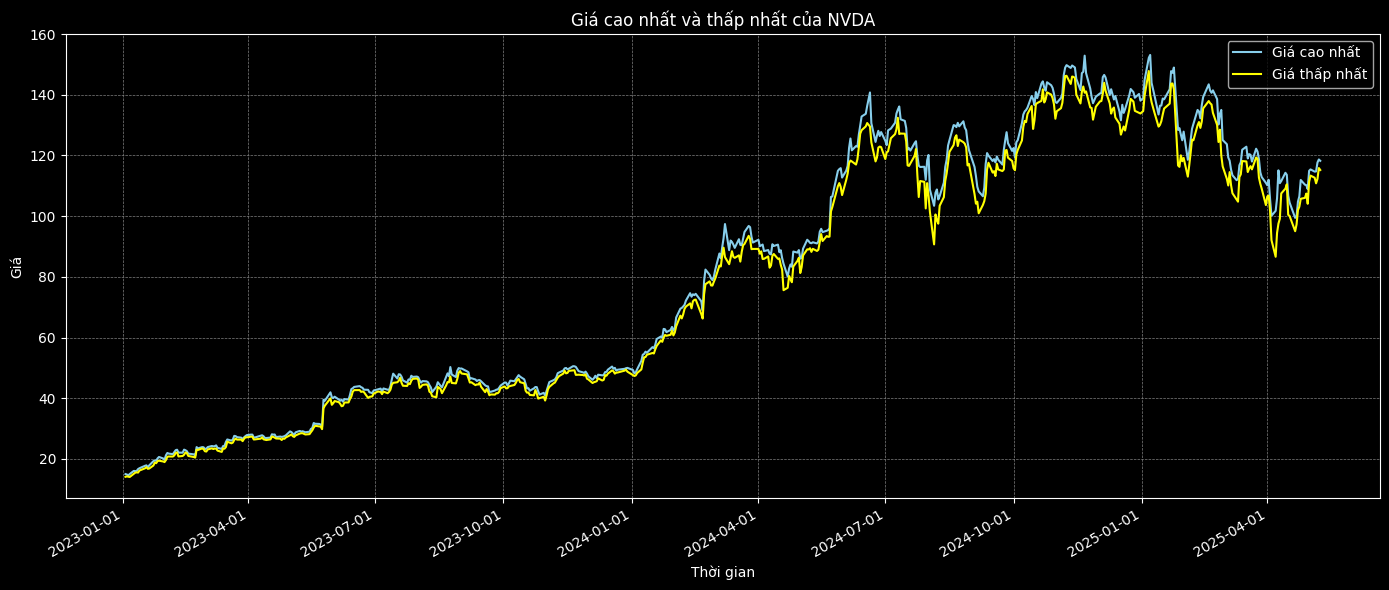

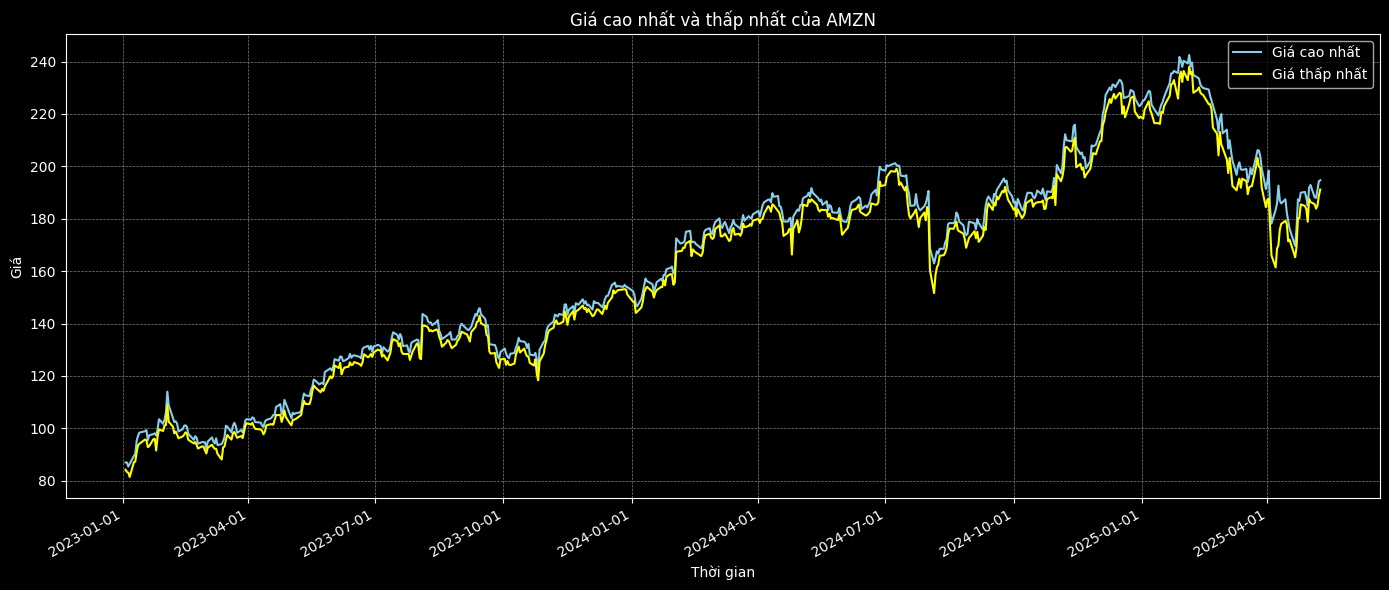

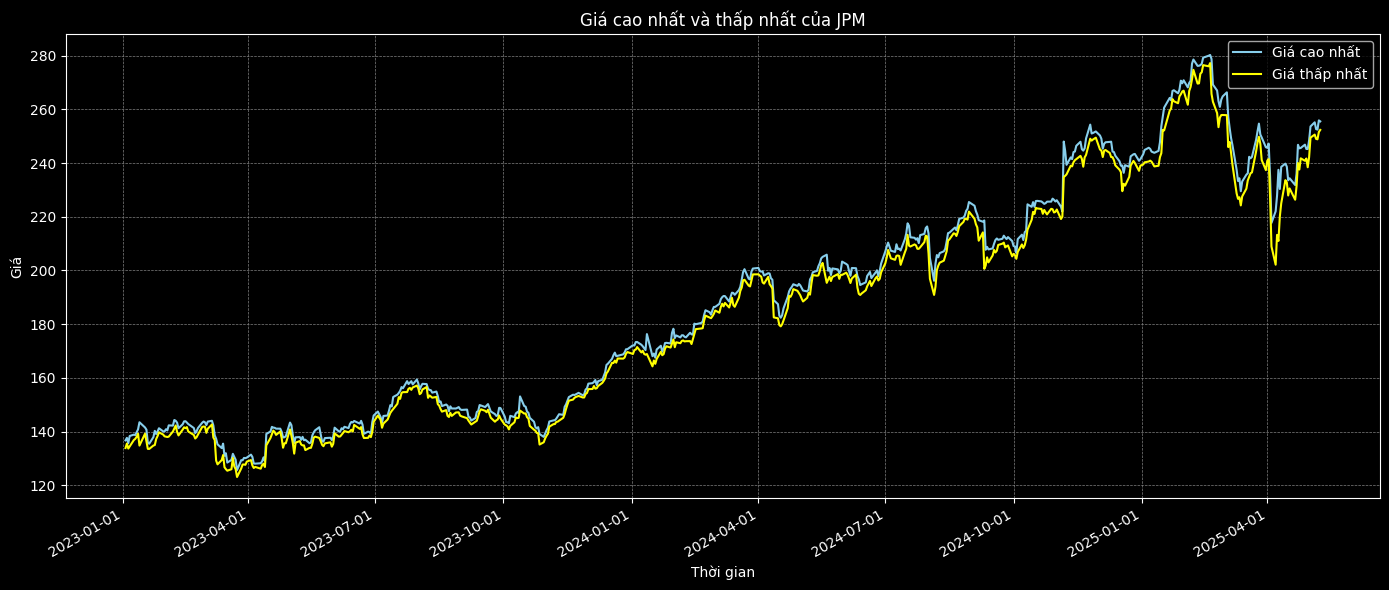

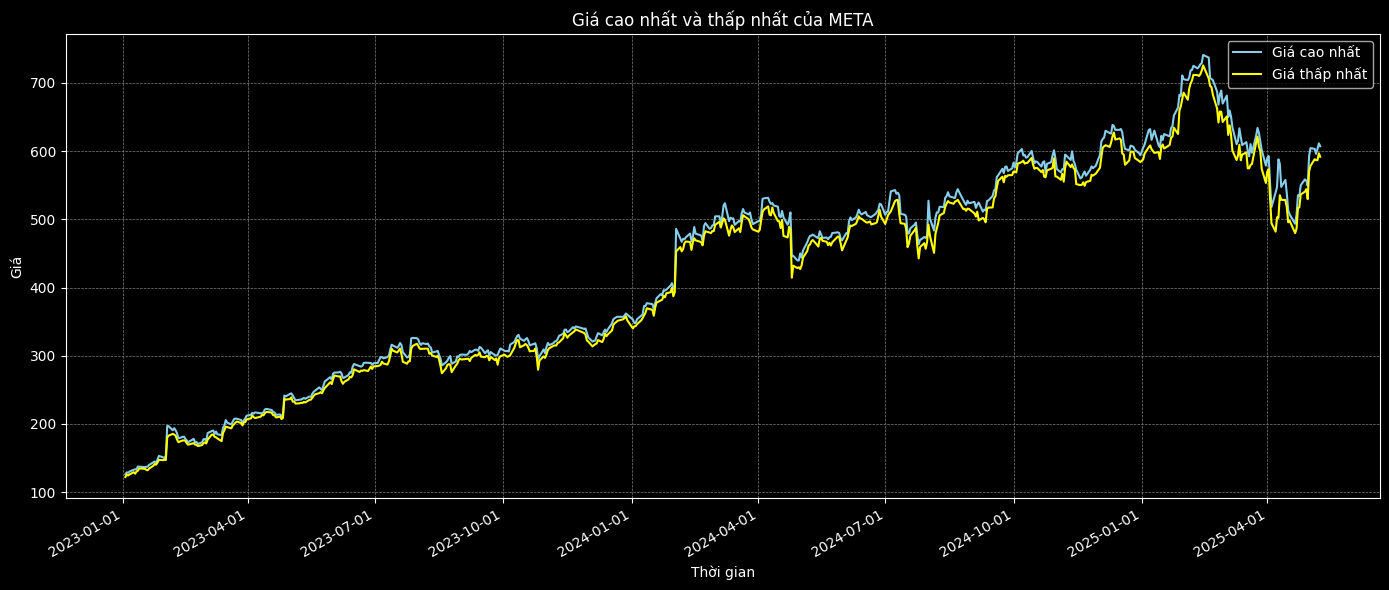

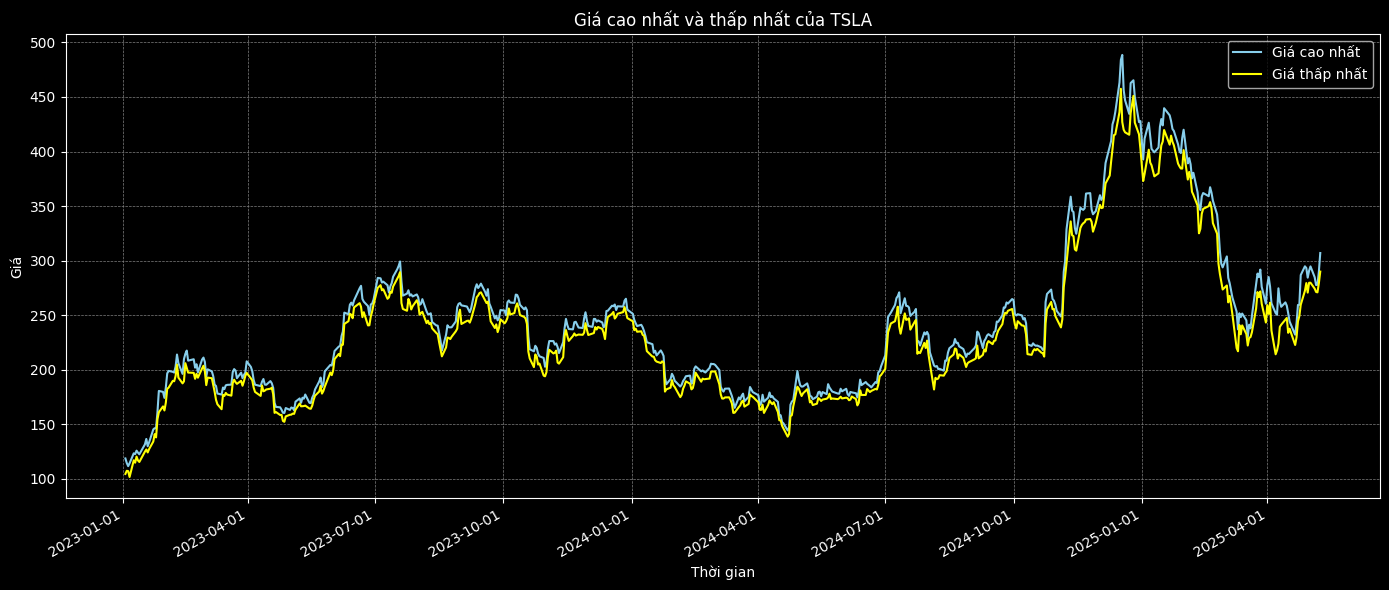

In [23]:
# Biểu đồ giá cao nhất và thấp nhất
for ticker in plot_symbols:
    if ticker in etf_data_mask:
        df_ticker = etf_data_mask[ticker].loc[start_date:end_date]

        fig, ax = plt.subplots(figsize=(14, 6))
        fig.patch.set_facecolor('black')
        ax.set_facecolor('black')
        ax.tick_params(colors='white')
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')
        ax.title.set_color('white')
        ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        fig.autofmt_xdate()

        ax.plot(df_ticker.index, df_ticker['high'], color='skyblue', label='Giá cao nhất')
        ax.plot(df_ticker.index, df_ticker['low'], color='yellow', label='Giá thấp nhất')

        ax.set_title(f'Giá cao nhất và thấp nhất của {ticker}')
        ax.set_xlabel('Thời gian')
        ax.set_ylabel('Giá')

        ax.legend()
        plt.tight_layout()
        plt.show()


# **Giá và các chỉ báo**

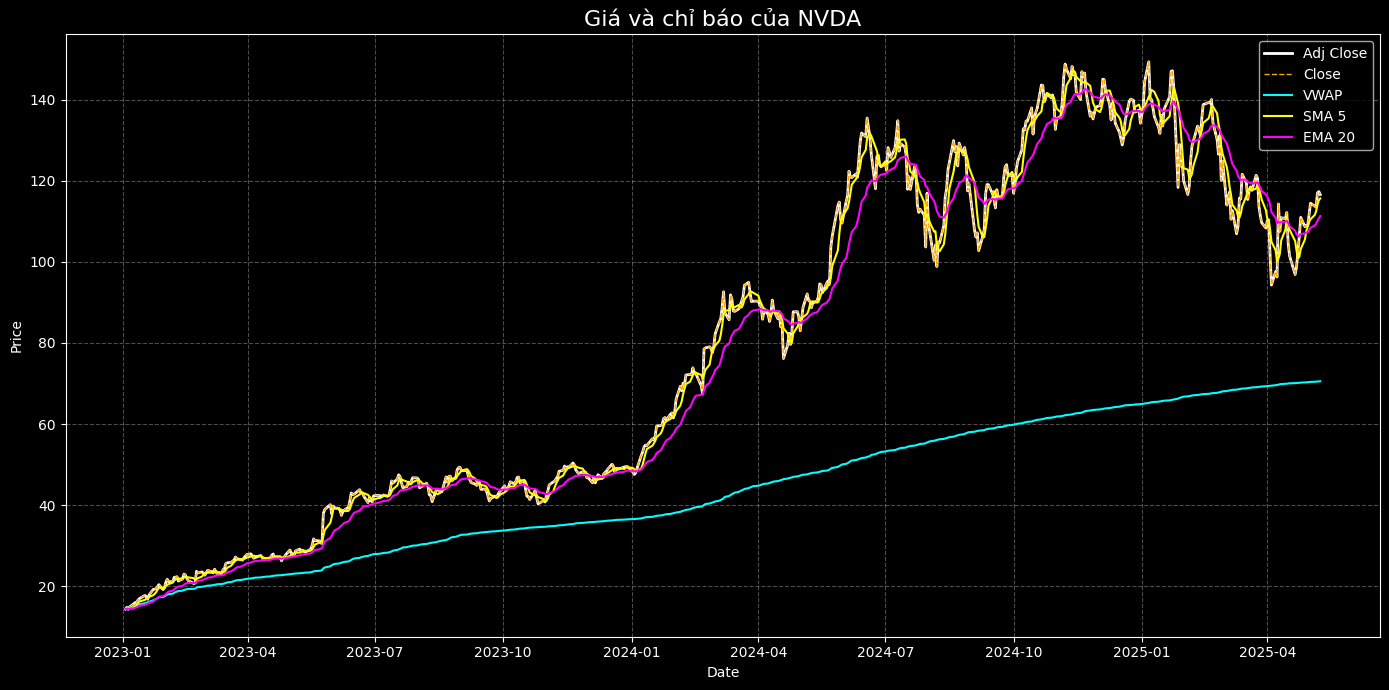

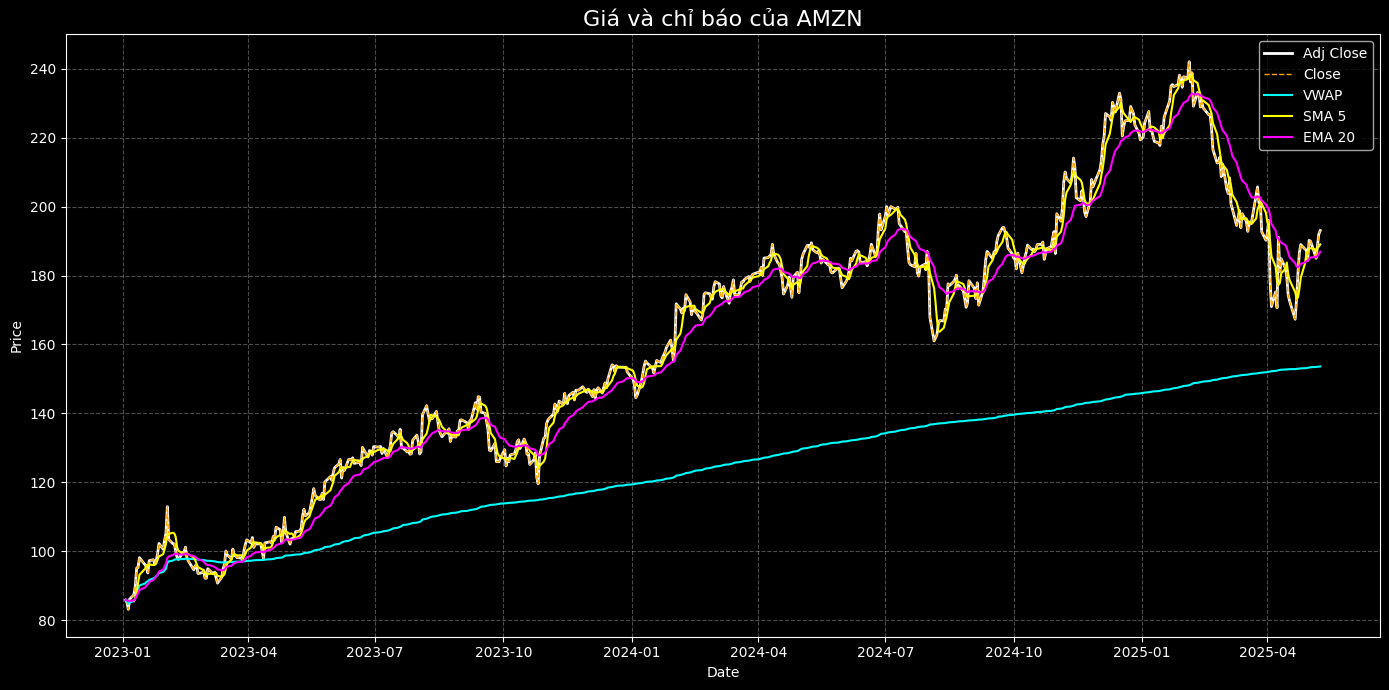

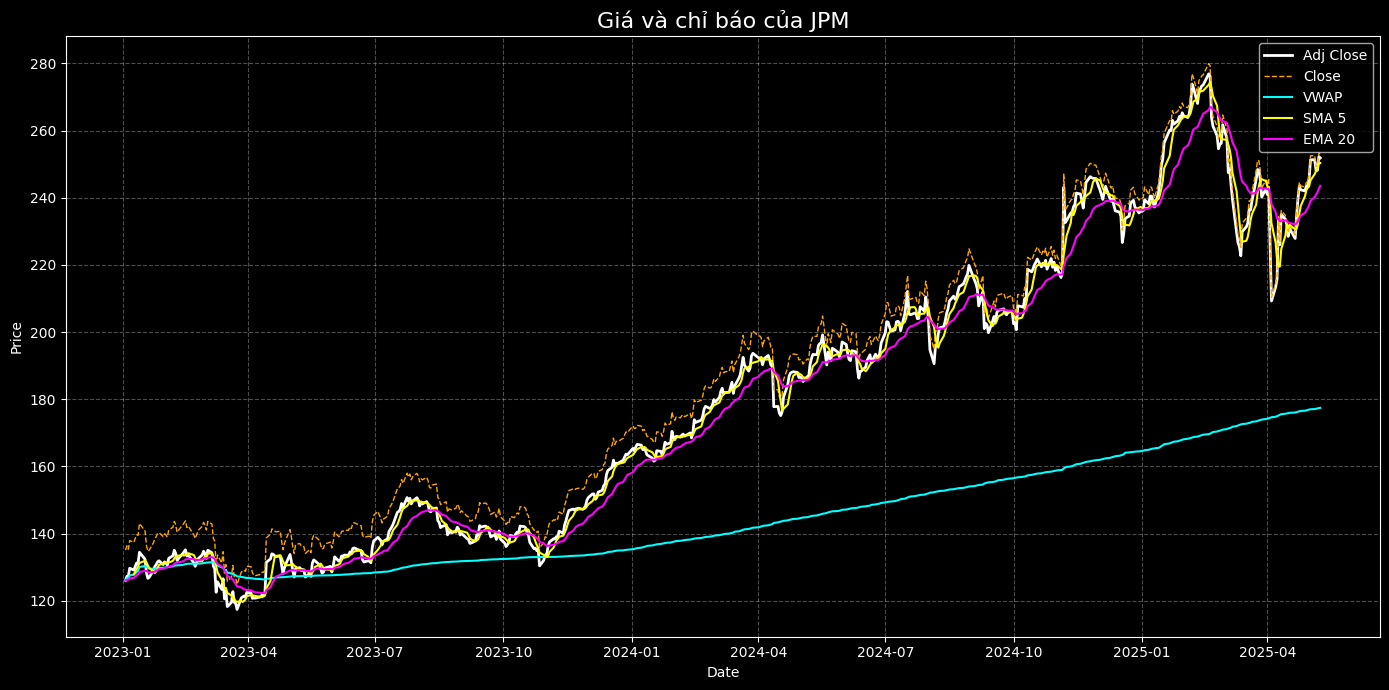

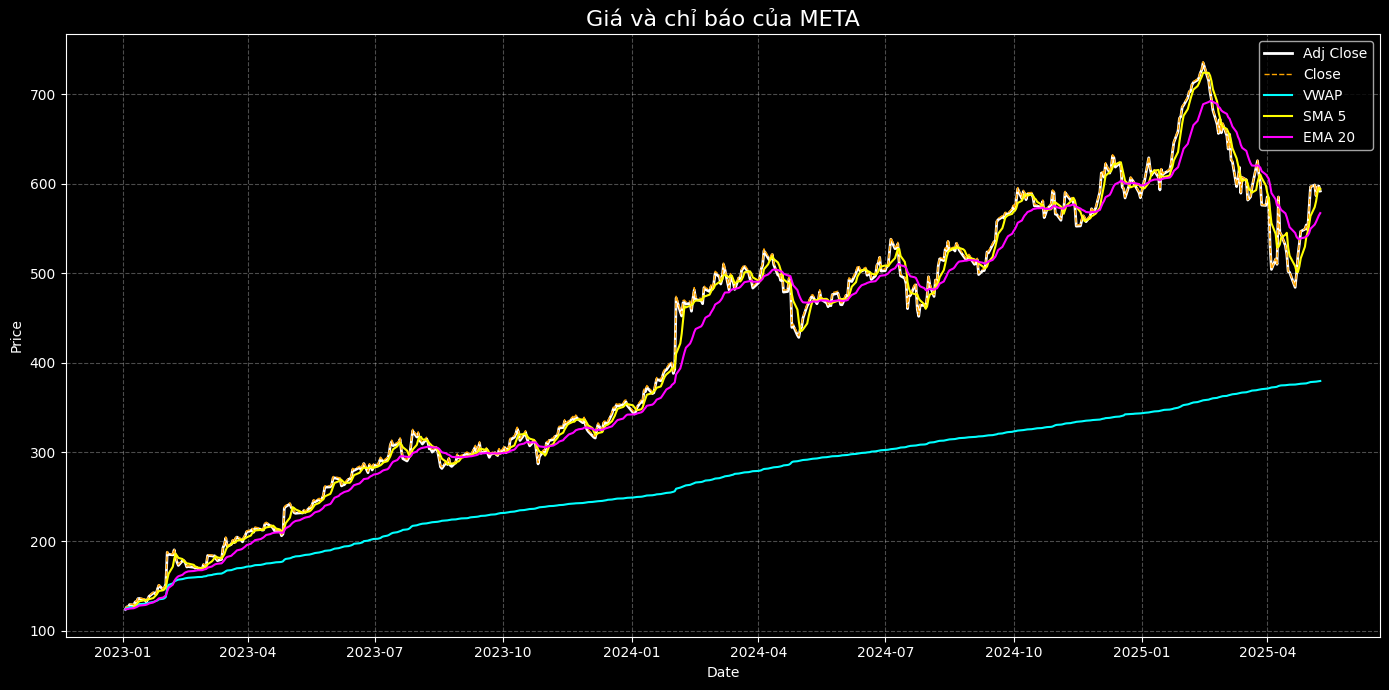

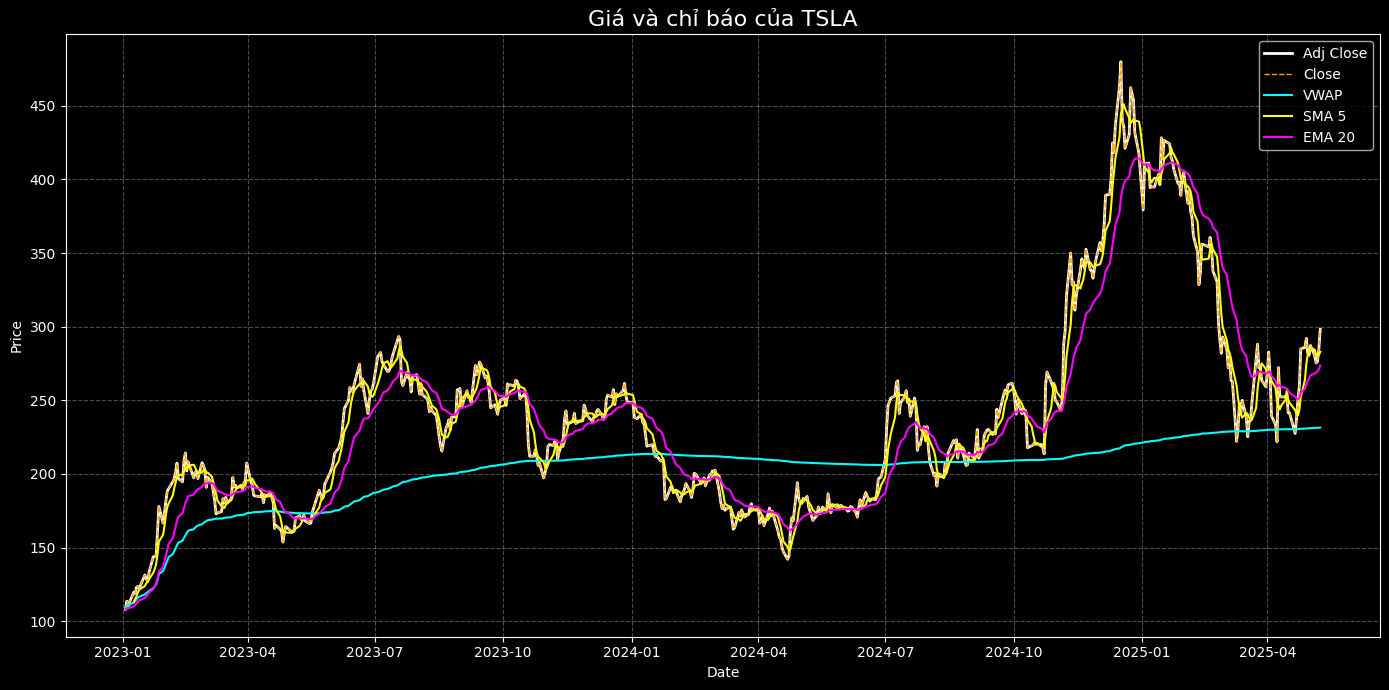

In [24]:
for ticker in plot_symbols:
    try:
        # Lấy DataFrame đã xử lý từ dictionary
        df_ticker = etf_data_mask[ticker].copy()

        # Lọc theo khoảng thời gian
        df_filtered = df_ticker[(df_ticker.index >= start_date) & (df_ticker.index <= end_date)]

        # Tạo biểu đồ
        plt.figure(figsize=(14, 7))  # Kích thước lớn hơn
        plt.style.use('dark_background')  # Nền đen

        # Vẽ các đường giá
        plt.plot(df_filtered.index, df_filtered['adj_close'], label='Adj Close', color='white', linewidth=2)
        plt.plot(df_filtered.index, df_filtered['close'], label='Close', color='orange', linewidth=1, linestyle='--')

        # Vẽ các chỉ báo
        plt.plot(df_filtered.index, df_filtered['vwap'], label='VWAP', color='cyan', linewidth=1.5)
        plt.plot(df_filtered.index, df_filtered['SMA_5'], label='SMA 5', color='yellow', linewidth=1.5)
        plt.plot(df_filtered.index, df_filtered['EMA_20'], label='EMA 20', color='magenta', linewidth=1.5)

        # Tuỳ chỉnh biểu đồ
        plt.title(f'Giá và chỉ báo của {ticker}', fontsize=16)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Tạo khoảng cách giữa các biểu đồ
        plt.pause(0.5)

    except KeyError:
        print(f"⚠️ Thiếu dữ liệu đã xử lý cho {ticker}, bỏ qua biểu đồ.")

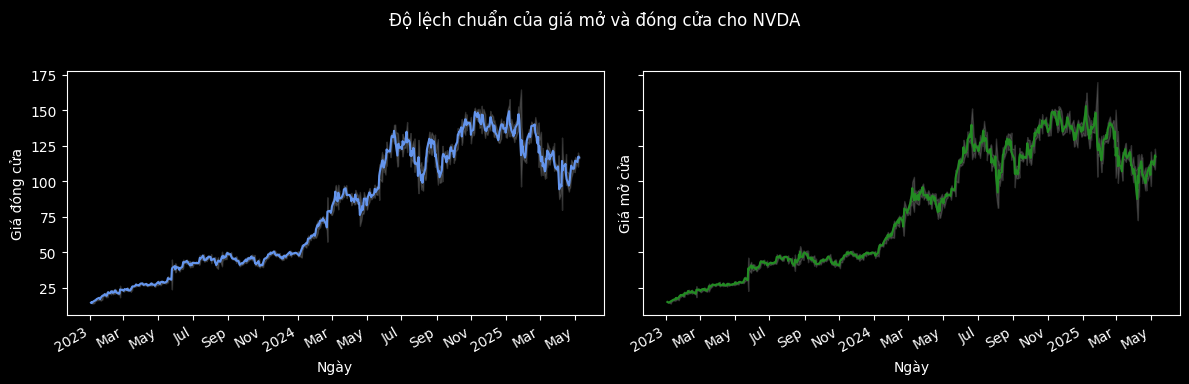

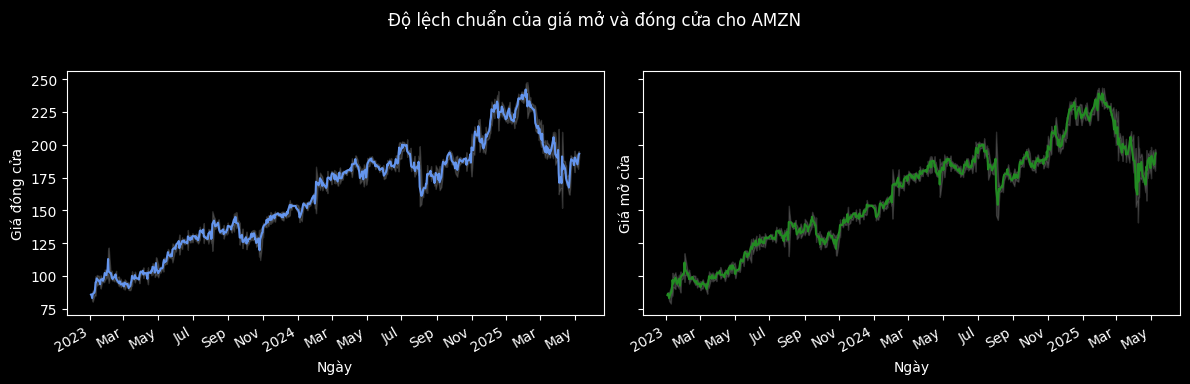

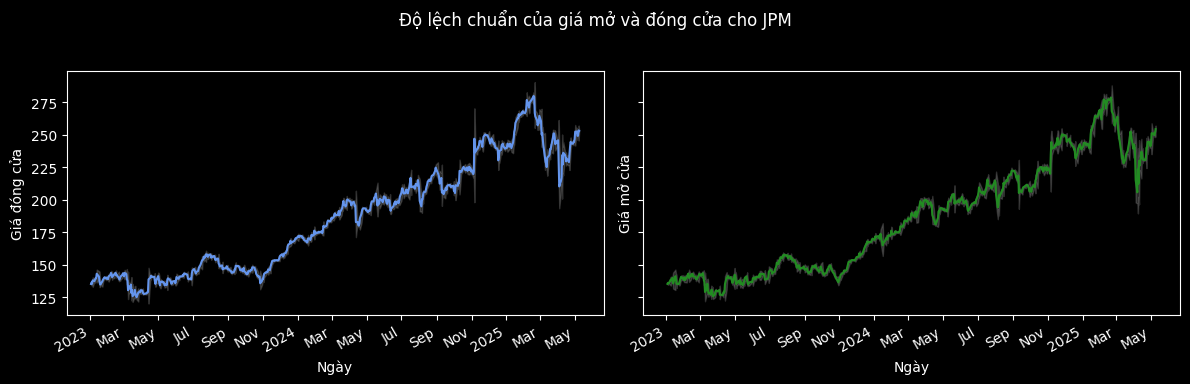

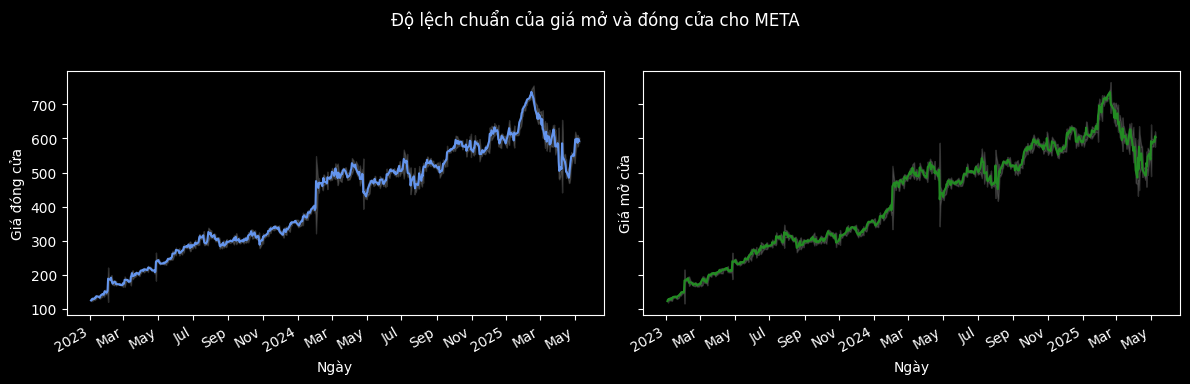

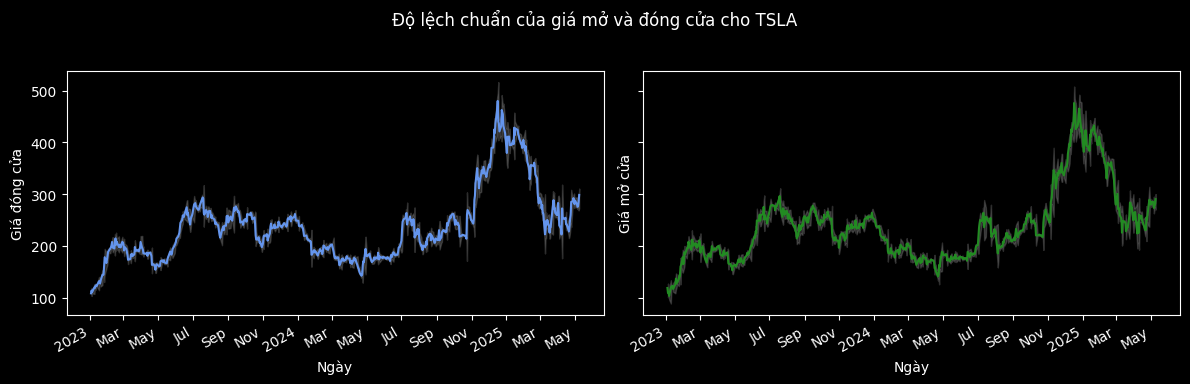

In [25]:
# Tính toán độ lệch chuẩn cho giá mở và đóng cửa
for ticker in plot_symbols:
    if ticker in etf_data_mask:
        df_ticker = etf_data_mask[ticker].loc[start_date:end_date].copy() # Sử dụng .copy() để tránh SettingWithCopyWarning

        # Tính rolling mean và standard deviation
        df_ticker['close_ma'] = df_ticker['close'].rolling(2).mean()
        df_ticker['close_mstd'] = df_ticker['close'].rolling(2).std()
        df_ticker['open_ma'] = df_ticker['open'].rolling(2).mean()
        df_ticker['open_mstd'] = df_ticker['open'].rolling(2).std()

        fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
        fig.suptitle(f"Độ lệch chuẩn của giá mở và đóng cửa cho {ticker}")

        for nn, ax in enumerate(axs):
            prices = [df_ticker['close'], df_ticker['open']]
            colors = ["cornflowerblue", "forestgreen"]
            means = [df_ticker['close_ma'], df_ticker['open_ma']]
            stds = [df_ticker['close_mstd'], df_ticker['open_mstd']]

            # Cấu hình định dạng ngày tháng
            locator = mdates.AutoDateLocator(minticks=3, maxticks=20)
            formatter = mdates.ConciseDateFormatter(locator)
            ax.xaxis.set_major_locator(locator)
            ax.xaxis.set_major_formatter(formatter)
            fig.autofmt_xdate() # Tự động định dạng ngày tháng trên trục x

            ax.set_xlabel("Ngày")

            # Vẽ đường giá và vùng fill
            ax.plot(prices[nn].index, prices[nn], colors[nn])
            # Sử dụng dropna() để xử lý các giá trị NaN do rolling gây ra ở đầu
            ax.fill_between(stds[nn].dropna().index, (means[nn] - 2 * stds[nn]).dropna(), (means[nn] + 2 * stds[nn]).dropna(), color="lightgrey", alpha=0.2)

        axs[0].set_ylabel("Giá đóng cửa")
        axs[1].set_ylabel("Giá mở cửa")


        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Điều chỉnh layout để tránh tiêu đề bị che khuất
        plt.show()


# **Biểu đồ nến về giá đóng cửa, khối lượng và chỉ số VWAP**

In [28]:
for ticker in etf_data_mask:
    df_ticker = etf_data_mask[ticker].loc[start_date:end_date]
    etf_data_mask[ticker] = df_ticker

num_symbols = len(plot_symbols)
fig = make_subplots(
    rows=num_symbols,
    cols=1,
    specs=[[{'secondary_y': True}] for _ in range(num_symbols)],
    subplot_titles=plot_symbols,
    shared_xaxes=False,
)

increasing_color = 'deepskyblue'
decreasing_color = 'gold'

for i, ticker in enumerate(plot_symbols):
    if ticker not in etf_data_mask:
        continue

    df_ticker = etf_data_mask[ticker]
    row = i + 1

    fig.add_trace(
        go.Candlestick(
            x=df_ticker.index,
            open=df_ticker['open'],
            high=df_ticker['high'],
            low=df_ticker['low'],
            close=df_ticker['close'],
            name=f'{ticker} Candlestick',
            increasing_line_color=increasing_color,
            decreasing_line_color=decreasing_color
        ),
        row=row, col=1, secondary_y=False
    )

    fig.add_trace(
        go.Scatter(
            x=df_ticker.index,
            y=df_ticker['close'],
            mode='lines',
            name=f'{ticker} Close',
            line=dict(color='lightblue', width=1),
            opacity=0.6
        ),
        row=row, col=1, secondary_y=False
    )

    fig.add_trace(
        go.Scatter(
            x=df_ticker.index,
            y=df_ticker['vwap'],
            mode='lines',
            name=f'{ticker} VWAP',
            line=dict(color='orange', dash='dot'),
            opacity=0.8
        ),
        row=row, col=1, secondary_y=False
    )

    fig.add_trace(
        go.Bar(
            x=df_ticker.index,
            y=df_ticker['volume'],
            name=f'{ticker} Volume',
            marker_color='rgba(180, 180, 180, 0.4)',
            opacity=0.4
        ),
        row=row, col=1, secondary_y=True
    )

fig.update_layout(
    height=300 * num_symbols,
    showlegend=False,
    title_text="Candlestick + Close + Volume + VWAP (Dark Mode)",
    title_x=0.5,
    template='plotly_dark',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

fig.update_xaxes(rangeslider_visible=False)
fig.update_layout(
    height=300 * num_symbols,
    showlegend=False,
    title_text="Candlestick + Close + Volume + VWAP (Dark Mode)",
    title_x=0.5,
    template='plotly_dark',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),

    annotations=[
        dict(
            x=0.5, y=1.02,
            xref='paper', yref='paper',
            text=(
                "<span style='color:lightblue'>─</span> Close &nbsp;&nbsp; "
                "<span style='color:orange'>⋯</span> VWAP &nbsp;&nbsp; "
                "<span style='color:deepskyblue'>🞂🞀</span> Nến tăng &nbsp;&nbsp; "
                "<span style='color:gold'>🞂🞀</span> Nến giảm &nbsp;&nbsp; "
                "<span style='color:gray'>▇</span> Volume"
            ),
            showarrow=False,
            font=dict(size=12),
            align='center'
        )
    ]
)


for i in range(num_symbols):
    fig.update_yaxes(title_text="Price", row=i + 1, col=1, secondary_y=False)
    fig.update_yaxes(title_text="Volume", row=i + 1, col=1, secondary_y=True)


fig.show()